<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets). 


In [26]:
# Write your code here
# Write your code here
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium





'apt-get' is not recognized as an internal or external command,
operable program or batch file.
'apt' is not recognized as an internal or external command,
operable program or batch file.
'cp' is not recognized as an internal or external command,
operable program or batch file.


In [27]:
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('-headless')
options.add_argument('-no-sandbox')
options.add_argument('-disable-dev-shm-usage')

In [28]:
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.common.by import By
import pandas as pd
import time

driver = webdriver.Chrome('chromedriver',options=options)
link = 'https://www.imdb.com/title/tt0111161/reviews?ref_=tt_urv'
title_array = []
review_array = []
driver.get(link)
for num in range(4):
  driver.find_element(By.CLASS_NAME, "ipl-load-more__button").click()
  time.sleep(5)
  listOfTitle = driver.find_elements(By.CLASS_NAME, "title")
  listOfReviews = driver.find_elements(By.CLASS_NAME, "text")
for ele, sub_ele in zip(listOfTitle, listOfReviews):
      title_array.append((ele.text).replace('\n',''))
      review_array.append(sub_ele.text)
dataframe = pd.DataFrame(list(zip(title_array, review_array)), columns =['Title', 'Review'])
print("Length of data frame is {0}".format(len(dataframe)))
dataframe

Length of data frame is 124


,Title,Review
0,Some birds aren't meant to be caged.,
1,An incredible movie. One that lives with you.,It is no wonder that the film has such a high ...
2,Don't Rent Shawshank.,I'm trying to save you money; this is the last...
3,This is How Movies Should Be Made,This movie is not your ordinary Hollywood flic...
4,A classic piece of unforgettable film-making.,
...,...,...
119,Highly Overrated But Still Good,A good prison movie whose cult of fans has mad...
120,A favourite film,When i watched this film i thought now whats t...
121,"Hope is a good thing, maybe the best of things.",Truly a masterpiece of cinema. I hope this fil...
122,A movie to fuel one's life.,"""Hope is a good thing, maybe the best thing.""s..."


In [29]:
#Converting to Lower Case
dataframe['Lower Case'] = dataframe['Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [30]:
#Removal of Punctuation
dataframe['Removal of Punctuation'] = dataframe['Lower Case'].str.replace('[^\w\s]','')

C:\Users\19408\AppData\Local\Temp\ipykernel_24300\2825624584.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe['Removal of Punctuation'] = dataframe['Lower Case'].str.replace('[^\w\s]','')


In [31]:
#Removal of Special Characters

import re
dataframe['Removal of Special Characters'] = dataframe['Removal of Punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', charctr) for charctr in x ))

In [32]:
#Removal of Stop words

from nltk.corpus import stopwords
stop = stopwords.words('english')
dataframe['Stopwords Removal'] = dataframe['Removal of Punctuation'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [33]:
#Spelling Correction

from textblob import TextBlob
dataframe['Spelling Correction'] = dataframe['Stopwords Removal'].apply(lambda x: str(TextBlob(x).correct()))

In [34]:
#Tokenization
import nltk
nltk.download('punkt')
dataframe['Tokenization'] = dataframe['Spelling Correction'].apply(lambda x: TextBlob(x).words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\19408\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [35]:
#Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
dataframe['After Stemming'] = dataframe['Tokenization'].apply(lambda x: " ".join([st.stem(word) for word in x]))

In [36]:
#Lemmatization
from textblob import Word
import nltk
nltk.download('wordnet')

dataframe['After Lemmatization'] = dataframe['After Stemming'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
dataframe.to_csv('movie_reviews.csv',index=False)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\19408\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [37]:
#1.1 - Trigrams
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize

words_sentence = []
for sentence in dataframe['After Lemmatization']:
  words_sentence.append(word_tokenize(sentence))
aftercleaning = [x for x in words_sentence if x != []]
iterations = list(itertools.chain.from_iterable(aftercleaning))

In [38]:
tri_grams = nltk.trigrams(iterations)
frequency_dist = nltk.FreqDist(tri_grams)
frequency_dist

FreqDist({('murder', 'wife', 'lover'): 13, ('convict', 'murder', 'wife'): 9, ('tim', 'rob', 'morgan'): 9, ('rob', 'morgan', 'freeman'): 9, ('rite', 'haworth', 'shawshank'): 7, ('haworth', 'shawshank', 'redempt'): 7, ('direct', 'frank', 'darabont'): 6, ('morgan', 'freeman', 'tim'): 6, ('freeman', 'tim', 'rob'): 6, ('adapt', 'stephen', 'king'): 6, ...})

In [39]:
#1.2 - Probability of Bi grams
from collections import Counter
bi_grams = nltk.bigrams(iterations)
frequency_dist = nltk.FreqDist(bi_grams)
bi_grams_dict = dict(frequency_dist)
for word in bi_grams_dict:
  print( str(word) + ':' + str(bi_grams_dict[word] / iterations.count(word[0])))

('wonder', 'film'):0.16666666666666666
('film', 'high'):0.0043859649122807015
('high', 'rate'):0.25
('rate', 'quit'):0.0625
('quit', 'liter'):0.06666666666666667
('liter', 'breathtak'):0.2
('breathtak', 'say'):0.3333333333333333
('say', 'hasn'):0.03125
('hasn', 'said'):0.6666666666666666
('said', 'much'):0.06666666666666667
('much', 'stori'):0.05555555555555555
('stori', 'act'):0.022988505747126436
('act', 'premis'):0.02702702702702703
('premis', 'movi'):0.5
('movi', 'make'):0.014285714285714285
('make', 'feel'):0.0625
('feel', 'sometim'):0.02564102564102564
('sometim', 'watch'):0.25
('watch', 'film'):0.11538461538461539
('film', 'can'):0.0043859649122807015
('can', 'rememb'):0.07692307692307693
('rememb', 'day'):0.14285714285714285
('day', 'later'):0.13333333333333333
('later', 'film'):0.2
('film', 'love'):0.008771929824561403
('love', 'you'):0.037037037037037035
('you', 'seen'):0.125
('seen', 'dont'):0.03125
('dont', 'forget'):0.03333333333333333
('forget', 'ultim'):0.2
('ultim', 'st

In [40]:
#1.3 Noun Phrases and relative probabilities of each review in terms of other reviews
whole_dataset = ''
index = []
i = 1
for line in dataframe['After Lemmatization']:
  whole_dataset = whole_dataset + line
  value = 'Review-' + str(i)
  index.append(value)
  i += 1

In [41]:
from textblob import TextBlob
noun_phrases = []
frequency = []
for line in dataframe['After Lemmatization']:
  blob = TextBlob(line)
  for nouns in blob.noun_phrases:
    noun_phrases.append(nouns)
for word in noun_phrases:
  noun_phrases_freq = []
  for line in dataframe['After Lemmatization']:
    noun_phrases_freq.append(line.count(word) / whole_dataset.count(word))
  frequency.append(noun_phrases_freq)
noun_phrases_df = pd.DataFrame(frequency).T
noun_phrases_df.columns = list(noun_phrases)
noun_phrases_df.index = index
noun_phrases_df

,wonder film high rate,liter breathtak,stori act premis movi,rememb day,ultim stori friendship hope life overcom advers,mani class,film time isn mine,time need,film titl consid borrow rent shawshank cost,buck plank,...,thingsaid andi,coupl time movi mustwatch,actor prison bit masculin,netflix chanc,ground person experi,movi persist faith oneself life,serv lifetim sentenc,quot search poorhous movi,drama itaewon class,drama male lead achiev lifetim goal
Review-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Review-120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Review-123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


# **Question 2: Undersand TF-IDF and Document representation**

In [42]:
# Write your code here
import math
def tf_idf_value(sentence,word):
  size = len(sentence.split(" "))
  tf_value = sentence.count(word)/size
  idf_value = 0
  if(tf_value!=0):
    idf_value = math.log(size)/sentence.count(word)
  else:
    return 0;
  return tf_value*idf_value

sentences = dataframe["Spelling Correction"].values.tolist()
tokens_list = set([j for i in sentences for j in i.split(" ")])
tf_idf = pd.DataFrame(tokens_list,columns=["token"])
count = 0
for i in sentences:
  tf_idf[str(count)] = tf_idf["token"].apply(lambda x : tf_idf_value(i,x))
  count+=1

tf_idf

C:\Users\19408\AppData\Local\Temp\ipykernel_24300\3116940528.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf[str(count)] = tf_idf["token"].apply(lambda x : tf_idf_value(i,x))
C:\Users\19408\AppData\Local\Temp\ipykernel_24300\3116940528.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf[str(count)] = tf_idf["token"].apply(lambda x : tf_idf_value(i,x))
C:\Users\19408\AppData\Local\Temp\ipykernel_24300\3116940528.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

,token,0,1,2,3,4,5,6,7,8,...,114,115,116,117,118,119,120,121,122,123
0,,0.0,0.072861,0.021942,0.033765,0.0,0.052748,0.0,0.030354,0.04043,...,0.013377,0.01245,0.298627,0.065764,0.06348,0.04915,0.055855,0.095726,0.050434,0.0
1,midst,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0
2,us,0.0,0.000000,0.021942,0.000000,0.0,0.000000,0.0,0.000000,0.04043,...,0.013377,0.01245,0.000000,0.000000,0.00000,0.04915,0.000000,0.000000,0.050434,0.0
3,sayings,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0
4,victorious,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,taxes,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0
3091,rented,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0
3092,hands,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0
3093,harmony,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,...,0.013377,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.0


In [43]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

In [44]:
query_sentence = 'The perfect portrait of a decline to insanity" & Joaquin Phoenix portrays this flawlessly in a performance of a lifetime. Choreographed impeccably by Todd Phillips & is nothing short of breathtaking. The cinematography & backdrop ideology of such an original film for such a complex character is only complimented by the superb soundtrack & acting. A hauntingly beautiful film & A Definate 10/10. Edit: Bring on part 2 plssssss!. We all want it!.'
X_list = word_tokenize(query_sentence)
sw = stopwords.words('english') 
X_set = {w for w in X_list if not w in sw}  

In [45]:
def compute_vector(X_set, Y_set):
  rvector = X_set.union(Y_set)
  l1 =[];l2 =[]
  for w in rvector: 
      if w in X_set: l1.append(1)
      else: l1.append(0) 
      if w in Y_set: l2.append(1) 
      else: l2.append(0)
  return rvector, l1, l2


In [46]:
def compute_cosine(rvector, l1, l2):
  c = 0
  for i in range(len(rvector)): 
        c+= l1[i]*l2[i] 
  cosine = c / float((sum(l1)*sum(l2))**0.5) 
  return cosine

In [47]:
similarity_list = []
for sentence in df['Spelling Correction']:
  Y_list = word_tokenize(sentence)
  Y_set = {w for w in Y_list if not w in sw}
  rvector, l1, l2 = compute_vector(X_set, Y_set)
  try:
    similarity = compute_cosine(rvector, l1, l2)
  except ZeroDivisionError:
    similarity = 'None'
  similarity_list.append(similarity)
cosine_dataframe = pd.DataFrame(list(zip(df['Review'],similarity_list)), columns=['Reviews','Cosine Similarity'])
cosine_dataframe

,Reviews,Cosine Similarity
0,,None
1,The movie affects you in a way that makes it p...,0.0
2,When I heard everyone saying that this is the ...,0.06134
3,"Truly a masterpiece, The Best Hollywood film o...",0.076139
4,I have seen Joker yesterday at Venice an early...,0.054293
...,...,...
120,Don't fall for it this movie is totally overhy...,0.0
121,,None
122,It was pretty clear from before the movie got ...,0.106452
123,There isn't much else to say; Joker is one of ...,0.074852


(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program: 

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [48]:
# Write your code here







# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model: 

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [49]:
# Write your code here
# Write your code here
from gensim.models import Word2Vec

# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sentence'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)






Word2Vec(vocab=14, size=100, alpha=0.025)
['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']
[ 7.8376429e-04 -2.6844318e-05 -4.6816994e-03 -6.6669972e-04
 -3.8275332e-03 -2.5946652e-03  1.1487115e-03 -8.0875511e-04
  2.6399260e-03  7.4299355e-04 -3.3349777e-03 -1.7316747e-03
  1.8882813e-03  1.0151500e-03  8.6869160e-04  1.7010748e-03
 -3.2138624e-03  1.3688498e-03 -4.6034204e-03  3.3792858e-03
 -4.6948916e-03  4.6495860e-03 -1.8535926e-03  8.9765212e-04
 -2.4116584e-03  3.8831644e-03 -3.1807688e-03  2.5343997e-04
  3.0774712e-03 -4.9835057e-03  4.7428515e-03 -2.3580104e-04
 -3.0307826e-03 -3.6781521e-03  2.9106189e-03 -2.5851175e-03
  2.2449668e-03 -2.4841046e-03 -9.2531508e-04  3.5916141e-03
  4.2725503e-03  3.9108293e-03 -4.3288679e-03  1.1562582e-03
 -1.8925308e-03  1.3809294e-03  4.9727233e-03  4.5214444e-03
  2.0601600e-03 -4.3070242e-03 -2.9486313e-04  2.4570625e-03
  8.1913965e-04  4.4280016e-03  6.9099216e-0

C:\Users\19408\anaconda3\lib\site-packages\gensim\models\base_any2vec.py:742: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  warnings.warn(
C:\Users\19408\AppData\Local\Temp\ipykernel_24300\3776333919.py:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(model['sentence'])


C:\Users\19408\anaconda3\lib\site-packages\gensim\models\base_any2vec.py:742: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  warnings.warn(
C:\Users\19408\AppData\Local\Temp\ipykernel_24300\2085862259.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[model.wv.vocab]


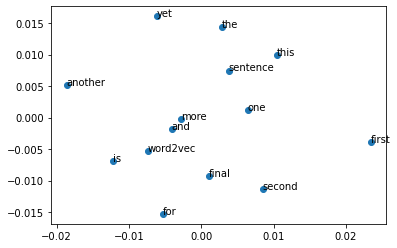

In [50]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
			['this', 'is', 'the', 'second', 'sentence'],
			['yet', 'another', 'sentence'],
			['one', 'more', 'sentence'],
			['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification. 


In [2]:
# The GitHub link of your final csv file



# Link: 



